In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [12]:
import pandas as pd
# Load the CIFAR-10 dataset
# Load CIFAR-10 data from CSV files
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Extract features and labels from the data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values


X_train = X_train / 255.0
X_test = X_test / 255.0



y_train = y_train.flatten()
y_test = y_test.flatten()



In [13]:
# Build a deeper model with Batch Normalization and Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(3072,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                196672    
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 199082 (777.66 KB)
Trainable params: 199082 (777.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
epochs = 10
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)



Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3531 - accuracy: 0.2338 - val_loss: 2.0150 - val_accuracy: 0.2884
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0743 - accuracy: 0.2832 - val_loss: 1.9431 - val_accuracy: 0.3136
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0254 - accuracy: 0.2905 - val_loss: 2.0946 - val_accuracy: 0.2906
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0780 - accuracy: 0.2906 - val_loss: 2.0221 - val_accuracy: 0.2975
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1747 - accuracy: 0.2780 - val_loss: 2.4522 - val_accuracy: 0.2611
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3324 - accuracy: 0.2638 - val_loss: 2.1483 - val_accuracy: 0.2890
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3950 - accuracy: 0.2604 - val_loss: 2.7829 - val_accuracy

In [5]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



313/313 [==============================] - 1s 4ms/step - loss: 5.6818 - accuracy: 0.2176
Test Accuracy: 21.76%


313/313 [==============================] - 1s 2ms/step


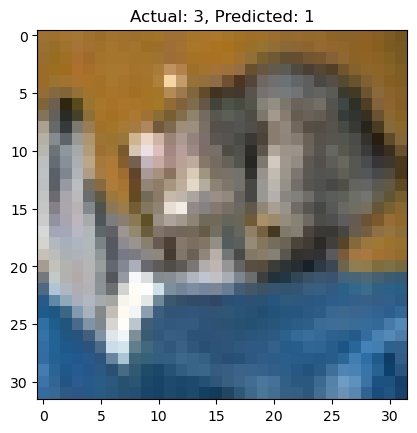

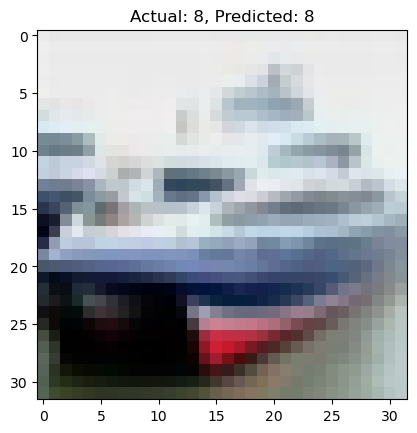

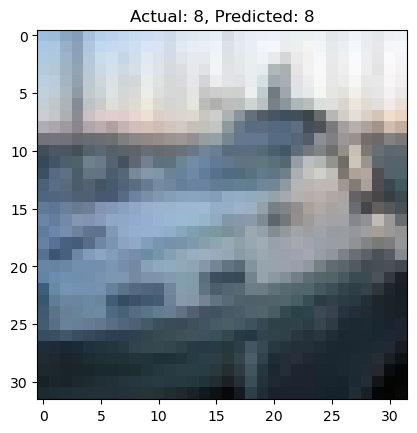

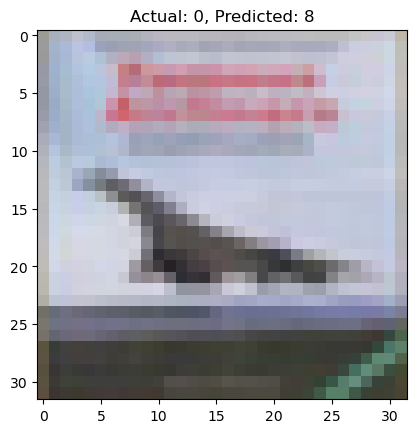

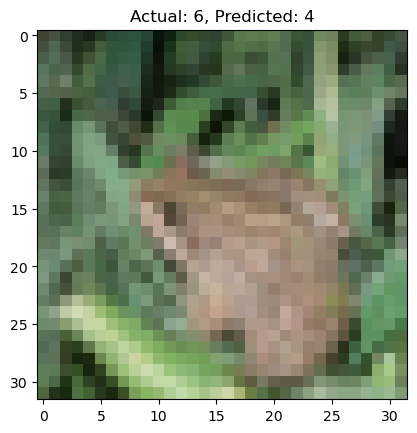

In [6]:
# Predictions
predictions = model.predict(X_test)

# Function to display actual and predicted labels with images
def display_actual_vs_predicted(index):
    actual_label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    plt.imshow(X_test[index].reshape(32, 32, 3))
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.show()
# Display a few examples
for i in range(5):
    display_actual_vs_predicted(i)



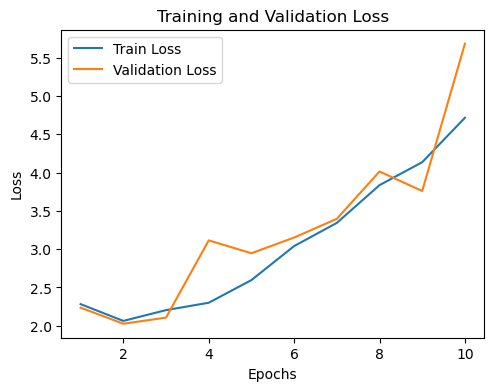

In [7]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), H.history['loss'], label='Train Loss')
plt.plot(range(1, epochs + 1), H.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



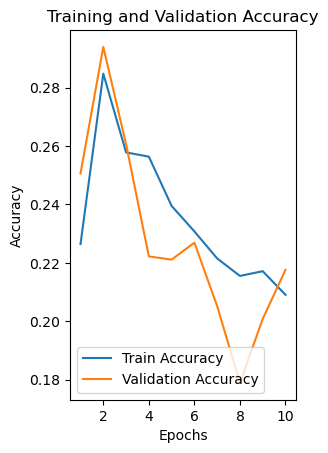

In [8]:
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), H.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, epochs + 1), H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
